# TEMAT №10 Szeregi czasowe (ang. time series)

 
 ### Czym są szeregi czasowe? 
 Szereg czasowy jest zbiorem obserwacji dokonywanych w równych odstępach czasu. 
 Służy do przewidywania przyszlych wartości w oparciu o poprzednie obserwacje, do których zalicza się;
 - prognozowania biznesowe (kursy walut, giełda...)
 - zrozumienia przeszlych zachowań i zaobserwowania przyszlych;
 - oszacowanie bieżących osiągnięć.
 
 Do analizy i prognozowania szeregów czasowych w Python stosowano bibliotekę  statsmodels.tsa.api, która zawiera modele i metody szeregów czasowych. Importowane kanonicznie przy użyciu importu statsmodels.tsa.api jako tsa.
API skupia się na modelach i najczęściej używanych testach statystycznych oraz narzędziach. Ścieżki importu i struktura wyjaśnia projekt dwóch modułów API i jak importowanie z API różni się od bezpośredniego importowania z modułu, w którym zdefiniowany jest model. Więcej informacji znajdziesz w dokumentacji https://www.statsmodels.org/stable/api.html. 
##### Podstawowe komponenty szeregów czasowych:
- trend
- sezonowość
- cykliczność
#### Co to jest Stacjonarność?
Szereg czasowy jest stacjonarny gdy z biegiem czasu zachowuje sie w sposów szczególny, istnieje bardzo duże prawdopodobieństwo, że w przyszlości będę postepować tak samo.
#### Sprawdzić szereg na stacjonarność można za pomocą:
- Rozszerzonego testu Dickeya-Fullera (ADF)
- Przekształcenia logarytmicznego (Box-Cox)
- Dekompozycji trendu sezonowego
- Usuwania trendów poprzez różnicowanie
- Naprawiania niestałej wariancji + usuwanie trendu.
#### Co wskazuje że szereg jest stacjonarnym:
- stała średnia;
- stala wariancja;
- autokowariancja jest niezależna od czasu.



## Czym jest autoregresja? 
Podstawowa koncepcja polega na tym, że prognozujemy interesujące szeregi czasowe y  zakładając, że mają one liniową zależność z innymi szeregami czasowymi x.
Autoregresja – to jest regresja statystyczna w której zmienna objaśniana jest przyszłą wartością ciągu, a zmienna objaśniająca to wartości ciągu czasowego z przeszłości. 
Zmienna prognozowana y jest nazywana także zależną lub objaśnianą. Zmienne predyktorów x są nazywane zmiennymi niezależnymi lub objaśniającymi.
Na przykład możemy prognozować miesięczną sprzedaż y, korzystając z całkowitych wydatków na reklamę x jako predyktora. Albo możemy prognozować dzienne zapotrzebowanie na energię elektryczną y używając temperatury x1 i dnia tygodnia x2 jako predyktorów.

###  Najczęściej stosowane modele statystyczne do prognozowania szeregów czasowych

#### - Wygładzanie wykładnicze 
Metoda obróbki szeregu czasowego zmniejszająca jego wariancję za pomocą ważonej średniej ruchomej z przeszłych wartości, o wagach malejących wykładniczo wraz z odległością w czasie. Stosowana do prostego usuwania szumu lub wizualizacji różnych danych. Jest również przydatna w prognozowaniu szeregów czasowych o niewielkim stosunku sygnału do szumu, szczególnie niemających wyraźnego trendu i wahań sezonowych.


#### - AR (model autoregresyjny)
Modele, w których bieżące wartości szeregu wyrażają się jako liniowe funkcje poprzednich obserwacji, nazywają się modelami autoregresji. Jeżeli bieżąca wartość ciągu xn zależy liniowo tylko od jednej poprzedniej wartości x_(n-1), to taki model jest modelem autoregresji pierwszego rzędu, co oznaczamy jako AR(1). Jeżeli bieżąca wartość ciągu xn zależy liniowo od p poprzednich wartości xn-1,…,xn-p, to taki model jest modelem autoregresji rzędu p, AR(p). 


#### - MA (model średniej ruchomej)
Proces ze średnią ruchomą, jest regresją liniową bieżącej wartości szeregów w odniesieniu do poprzednich wartości błędu, związanych z białym szumem lub przypadkowymi zaburzeniami. Zakłada się, że takie przypadkowe zaburzenia w każdym z punktów pochodzą z tego samego rozkładu, zwykle rozkładu normalnego z zerową wartością oczekiwaną i stałą wariancją. 


#### - ARMA (model autoregresji ze średnią ruchomą)-  obejmuje dwa proste modele ciągów czasowych AR oraz MA. 
Użyteczność modeli ARMA polega na ich oszczędnej reprezentacji. Podobnie jak w przypadku AR i MA, właściwości modeli ARMA można zwykle scharakteryzować za pomocą ich funkcji autokorelacji. Modele ARMA są używane do opisu stacjonarnych ciągów czasowych. Także niektóre rodzaje niestacjonarności można sprowadzać do procesów stacjonarnych przez tworzenie procesów różnic i dalej stosować np.  modele ARMA.


#### - ARIMA (zintegrowany model autoregresji ze średnią ruchomą)
jest złożony z następujących elementów: autoregresja (AR), całkowanie (I) oraz średnia ruchoma (MA). ARIMA jest formą analizy regresji, która mierzy siłę jednej zmiennej zależnej w stosunku do innych zmiennych. Model ten jest szeroko stosowany do prognozowania przyszłych wartości danych, badając różnice między wartościami w ciągach zamiast wartości oryginalnych. Modele zintegrowane służą do opisów procesów stochastycznych niestacjonarnych.
ARIMA z parametrami p, d i q, gdzie:
p - liczba opóźnień obserwacji w modelu.
d - stopień różnicy.
q - zakres średniej ruchomej.


## Dobór modelu

#### 1. Test ADF (rozszerzony test Dickeya-Fullera)
Dla sprawdzenia stacjonarności ciągu robimy analizę za pomocą rozszerzonego testu Dickeya Fullera (ADF). Przy analizie testu ADF warto zwrócić uwagę, że hipoteza zerowa wskazuje na istnienia niestacjonarności. Jeżeli obliczona wartość p jest mniejsza od zadanej alfa, to ta hipoteza zerowa zostaje odrzucona, a ciąg  jest stacjonarny. W przeciwnym razie dane są niestacjonarne.

#### 2. ACF i PACF 

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości. Dzięki tej wiedzy można określić kolejność procesów w modelu ARIMA. Dokładniej rzecz ujmując:

##### Funkcja autokorelacji (ACF).
Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Występuje wtedy, gdy skutki działania zmienności losowej nie wygasają w danym okresie t, lecz są przenoszone na okresy przyszłe. 
plot_acf()
http://drizzt.home.amu.edu.pl/images/DADA/W7.pdf

##### Funkcja autokorelacji cząstkowej (PACF). 
jak sama nazwa wskazuje, PACF jest podzbiorem funkcji autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy.
ACF i PACF stosowane są do wyboru rzędu modeli.  PACF pokazuje zależność między xn a poprzednimi wartościami, pomijając wpływ pośrednich opóźnień.
plot_pacf()

Oś x wykresu ACF wskazuje przesunięcie, dla jakiego obliczana jest autokorelacja; oś y wskazuje wartość korelacji (między −1 a 1). Na przykład linia rzutowania przy przesunięciu wynoszącym 1 na wykresie ACF oznacza silną korelację między każdą wartością szeregu a wartością poprzedzającą, zaś linia rzutowania przy przesunięciu wynoszącym 2 oznacza silną korelację między każdą wartością a wartością występującą dwa punkty wcześniej itd.
Korelacja dodatnia oznacza, że duże wartości bieżące odpowiadają dużym wartościom dla danego przesunięcia; ujemna korelacja oznacza, że duże wartości bieżące odpowiadają niewielkim wartościom dla danego przesunięcia.
Wartość bezwzględna korelacji stanowi miarę siły powiązania, przy czym większe wartości bezwzględne oznaczają silniejsze relacje.

#### 3. AIC (kryterium informacyjne Akaikego)
jest estymatorem błędu predykcji w próbie, a tym samym względnej jakości modeli statystycznych dla danego zbioru danych. Jest to jeden ze wskaźników dopasowania modelu, który stosuje się do wyznaczenia miary jakości modeli statystycznych dla badanego zbioru danych. To jak błąd średniokwadratowy w autoregresji — im mniejsza liczba, tym lepiej jest dopasowany model. Na ogół model o większej liczbie predyktorów (parametrów) daje dokładniejsze przewidywania, ponadto ma większą skłonność do przeuczenia. Kryteria informacyjne są nazywane metodami porównywania modeli dla zmiennej zależnej, i stosowane są do wyboru najlepszego modelu.



## Biblioteki

- pip install numpy scipy scikit-learn  #--- to the anaconda terminal
- pip install --user pmdarima   #---installing auto-arima
- pip install -U statsmodels   #---instaling  statsmodels
- import pandas as pd
- from pandas import DataFrame
- import datetime 
- from matplotlib import pyplot
- import matplotlib.pyplot as plt
- from statsmodels.tsa.stattools import adfuller
- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
- from statsmodels.tsa.arima.model import ARIMA
- import pmdarima as pm
- from pmdarima import model_selection
- import numpy as np
- %matplotlib inline


# Zadanie do ćwiczenia   
### Na podstawie danych zawartych w pliku analiza.csv wykonaj następne punkty:
#### 1) Zaimportuj niezbędne biblioteki do szeregów czasowych (https://www.statsmodels.org/stable/api.html), a także biblioteki do operacji na danych oraz tworzenia wykresów.
#### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.
#### 3) Wykonaj wstępny wykres uzyskanych danych (typu "scatter") https://miroslawmamczur.pl/006-wykres-rozrzutu-scatter-plot/
#### 4) Oblicz ADF (p-value, 'ADF Statistic)
#### 5) Wykonaj wykres ACF
#### 6) Wykonaj wykres PACF
#### 7) Podzieł szereg na dane na treningowe i testowe oraz oblicz kryterium  AIC dla modelu ARIMA (3,0.1) (results.summary())
#### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.
#### 9) Zrób wykreś do prognozy
#### 10) Wnioski

# Rozwiązanie 

###  1) Zaimportuj niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [28]:
import numpy as np
from pmdarima import model_selection
import pmdarima as pm
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline


### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [29]:
import pandas 
df =pandas.read_csv("analiza.csv", sep = ",", decimal = ",")
print(df.head(7))

print(df.describe())
print(df.shape)


      Data  Rezerwacja
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
5  1949-06         135
6  1949-07         148
       Rezerwacja
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
(144, 2)


### 3) Wykonaj wstępny wykres uzyskanych danych 


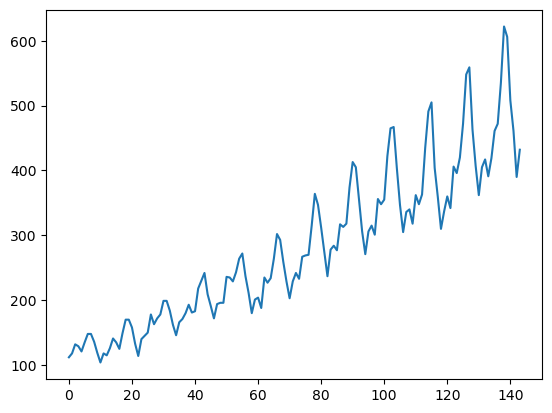

In [30]:
df_rez = df[['Rezerwacja']]
df_rez.head()
plt.plot(df_rez)

### 4) Oblicz ADF

In [114]:
#ADF rozszerzony Test Dickeya-Fullera dla sprawdzenia stacjonarności

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

df = read_csv('analiza.csv', header=0, index_col=0)
result = adfuller(df.values)
print('P-value - macKinnon\'s approximate p-value: %f' % result[1])
print('ADF - the test statistic: %f' % result[0])

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
 

Pvalue - macKinnon's approximate p-value: 0.991880
ADF - the test statistic: 0.815369
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Wartość p jest większa niż wartość krytyczna dla 5%, więc hipoteza zerowa testu Dickeya-Fullera (szereg czasowy jest niestacjonarny) pozostaje nieodrzucona. Znaczy to, że szereg ma pewną strukturę zależną od czasu, co można nazwać trendem. 

### 5) Wykonaj wykres ACF


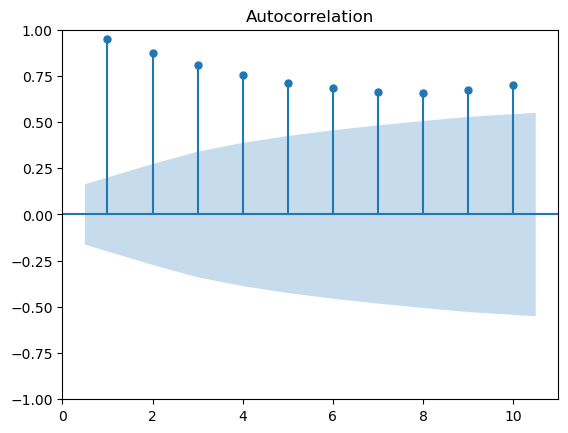

In [32]:
#ACF wykres funkcji autokorelacji 

plot_acf(df, zero=False, lags=10)
plt.show()


### 6) Wykonaj wykres PACF


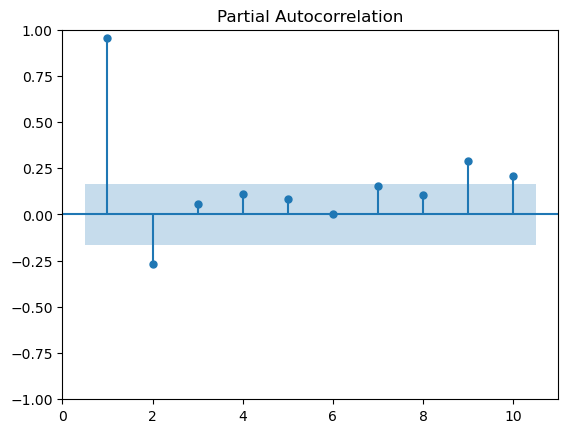

In [33]:
#PACF - wykres częsciowej funkcji autokorelacji
plot_pacf(df, zero=False, lags=10)
plt.show()

### 7) Podzieł szereg na dane treningowe i testowe wędlug uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -660.749
Date:                Mon, 12 Dec 2022   AIC                           1333.497
Time:                        21:04:01   BIC                           1349.590
Sample:                             0   HQIC                          1340.022
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.6430      1.482    180.566      0.000     264.738     270.548
ar.L1          0.8221      0.109      7.536      0.000       0.608       1.036
ar.L2          0.0088      0.135      0.065      0.9

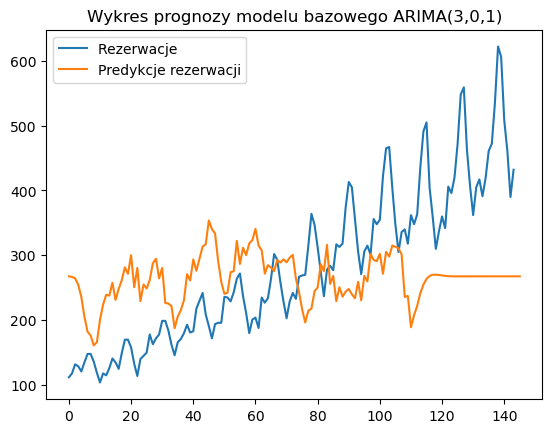

In [127]:
from sklearn.model_selection import train_test_split
X = df_rez.values
y = np.arange(0, 144)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model3 = ARIMA(X_train, order=(3,0,1))
results3 = model3.fit()
res_predictions3 = results3.predict(start=0, end=145)
print(results3.summary())

# plot
plt.figure()
plt.title('Wykres prognozy modelu bazowego ARIMA(3,0,1)')
plt.plot(df_rez[0:145], label='Rezerwacje ')
plt.plot(res_predictions3, label="Predykcje rezerwacji")
plt.legend()
plt.show()

Podzielenie na zbiór testowy i treningowy według funkcji train_test_split nie dało oczekiwanych wyników. W modelach następnych zbiory są dobierane następująco: 
- około pierwsze 70% indeksów to zbiór treningowy
- następne 30% indeksów to zbiór testowy


In [40]:
#ARIMA
X = df_rez.values
train = X[0:106] # dane treningowe
test = X[106:145]  #dane testowe
predictions = [train, test]

model = ARIMA(train, order=(3,0,1))
results = model.fit()
res_predictions = results.predict(start=0, end=106)
# print(res_predictions)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  106
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -483.726
Date:                Mon, 12 Dec 2022   AIC                            979.452
Time:                        19:44:15   BIC                            995.432
Sample:                             0   HQIC                           985.929
                                - 106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.2032     41.783      5.486      0.000     147.311     311.096
ar.L1          0.4709      0.122      3.866      0.000       0.232       0.710
ar.L2          0.5572      0.150      3.710      0.0

Wartość AIC to 979.452.

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [109]:
#AUTO-ARIMA
import warnings

# Use the filterwarnings function to suppress warnings
warnings.filterwarnings('ignore')

auto_arima_model = pm.auto_arima(train, exogenous=None, seasonal=False, m=1, d=1, D=1,   #pm.auto.arima
                     max_p=4, max_q=3, trace=True, error_action='ignore', 
                     suppress_warning=True)

results = auto_arima_model.fit(train)

print(results.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=981.938, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=975.827, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=970.608, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=980.745, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=966.476, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=966.499, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=971.036, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=965.072, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=968.992, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=974.202, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=962.188, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=969.879, Time=0.0

Najlepszy model jaki znalazła funkcja pm.auto_arima() to ARIMA(1,1,2)(0,0,0)[0] - z wartością AIC=961.038.

# Wykonaj wykres prognozy

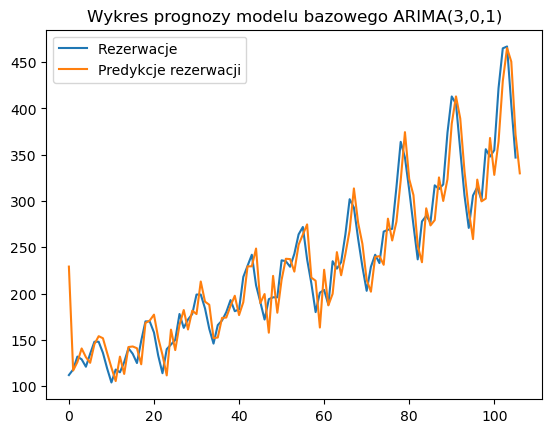

In [71]:
plt.figure()
plt.title('Wykres prognozy modelu bazowego ARIMA(3,0,1)')
plt.plot(df_rez[0:106], label='Rezerwacje ')
plt.plot(res_predictions, label="Predykcje rezerwacji")
plt.legend()
plt.show()

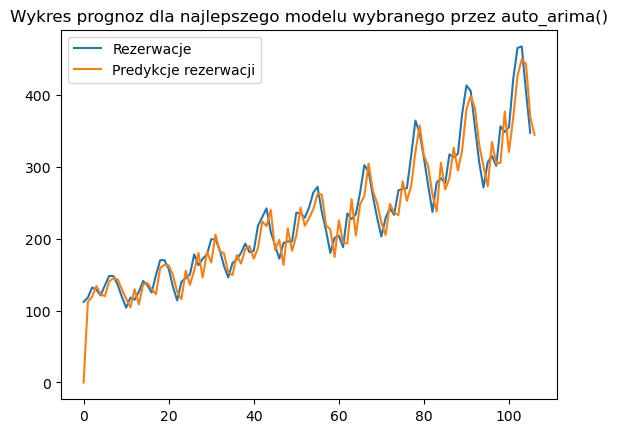

In [108]:
# Let's check if the given best model from auto-arima is actually better:
model2 = ARIMA(train, order=(1, 1, 2))
results2 = model2.fit()
res_predictions2 = results2.predict(start=0, end=106)

# plot:
plt.figure()
plt.title('Wykres prognoz dla najlepszego modelu wybranego przez auto_arima()')
plt.plot(df_rez[0:106], label="Rezerwacje")
plt.plot(res_predictions2, label="Predykcje rezerwacji")
# plt.plot(diff_1[0], label="Model ARIMA(3,0,1)")
# plt.plot(diff_2[0], label="Model ARIMA(1,1,2)")
# plt.plot(df_rez[0:106]-res_predictions2)
plt.legend()
plt.show()

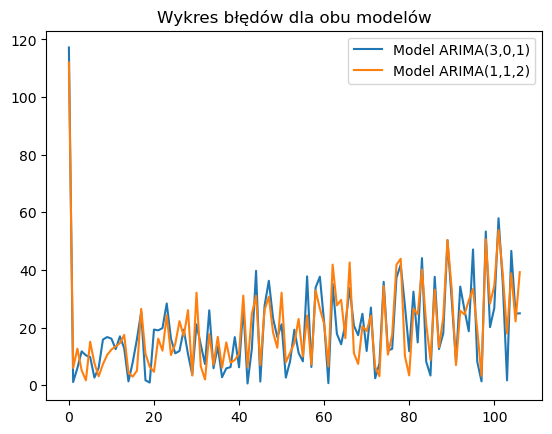

In [113]:
# make df_rez train sample a numpy array and reshape it so
# subtracting predictions from it is possible:
np_df_rez = df_rez[0:107].to_numpy()
np_df_rez2 = np_df_rez.reshape(107,)

diff_1 = np.abs(np_df_rez2 - res_predictions)
diff_2 = np.abs(np_df_rez2 - res_predictions2)

# plot of the error between a prediction and the actual value:
plt.figure()
plt.title('Wykres błędów dla obu modelów')
plt.plot(diff_1, label="Model ARIMA(3,0,1)")
plt.plot(diff_2, label="Model ARIMA(1,1,2)")
# plt.plot(df_rez[0:106]-res_predictions2)
plt.legend()
plt.show()

Ponieważ w wykresie tym występują duże wahania wartości co próbkę, następny będzie wykresem kumulowanej wartości błędu co próbkę.

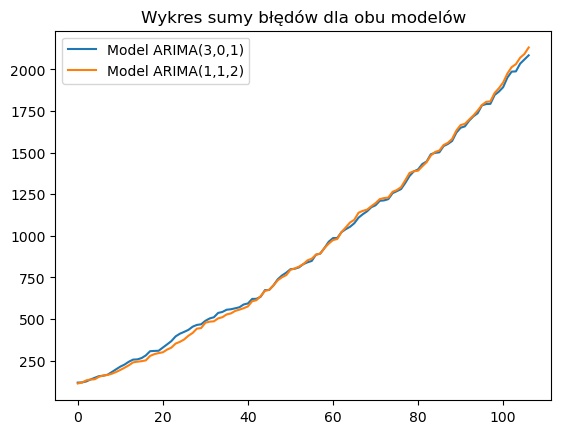

In [112]:
# cumulative sum of differences:
sum_diff_1 = np.cumsum(diff_1)
sum_diff_2 = np.cumsum(diff_2)

# plot of the error between a prediction and the actual value:
plt.figure()
plt.title('Wykres sumy błędów dla obu modelów')
plt.plot(sum_diff_1, label="Model ARIMA(3,0,1)")
plt.plot(sum_diff_2, label="Model ARIMA(1,1,2)")
# plt.plot(df_rez[0:106]-res_predictions2)
plt.legend()
plt.show()

# print(np.sum(diff_1))
# print(np.sum(diff_2))
# diff_1.tofile('data.csv', sep=',')

## Wnioski

Szereg czasowy z pliku 'analiza.csv' podczas testu ADF nie odrzucił hipotezy zerowej, co znaczy, że jest niestacjonarny.

Model który został wybrany przez funkcję auto_arima() to ARIMA(order=(1,1,2)). ARIMA to zintegrowany model autoregresji ze średnią ruchomą. Sporządziłem wykres prognozy tego modelu powyżej. Funkcja ta porównuje modele ARIMA i znajduje ten najlepiej dopasowany patrząc m.in. na wskaźnik AIC, czyli Akaike Information Criterion, który jest metryką do ewaluacji jakości modelu statystycznego. Metryka ta bierze pod uwagę złożoność modelu i ilość błędów. Czym niższa tym lepiej. Model początkowy (3,0,1) miał wartość AIC=979.452, a model wybrany przez funckję auto_arima() był niewiele lepszy, bo miał wartość AIC=961.038. Mimo tego, porównując tylko sumę różnic w wartościach predykcji i rzeczywistych wartości, model ARIMA(3,0,1) wyszedł troszeczkę lepiej, co przedstawiłem na ostatnim wykresie.

Do sporządzenia wszystkich wykresów korzystałem z wartości próbek ['Rezerwacja'] od [0:106] - taka była długość predykcji które otrzymywałem z modelu funkcją predict(), które miały sens, ponieważ zbiór treningowy był od 0 do 106, a potem próbki były używane do testowania.